In [1]:
import sys
sys.path.append('../src/vysxd')
from vysxd_analysis import *
from vysxd_define import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

In [2]:
'''
Change this based on which simulation you would like to look at
'''

simulation_name = "magshockz-v1.0.2d" 
proj_dir = os.getcwd().removesuffix("analysis_scripts")
print(proj_dir)

/home/david/MagShockZ/


In [3]:
# move into that directory
os.chdir(f'../simulations/raw_data/{simulation_name}')
species = os.listdir('MS/DENSITY')

electronsBackground
['charge-ionsBackground-000000.h5' 'charge-ionsBackground-000001.h5'
 'charge-ionsBackground-000002.h5' 'charge-ionsBackground-000003.h5'
 'charge-ionsBackground-000004.h5' 'charge-ionsBackground-000005.h5'
 'charge-ionsBackground-000006.h5' 'charge-ionsBackground-000007.h5']
['charge-ionsBackground-000000.h5', 'charge-ionsBackground-000001.h5', 'charge-ionsBackground-000002.h5', 'charge-ionsBackground-000003.h5', 'charge-ionsBackground-000004.h5', 'charge-ionsBackground-000005.h5', 'charge-ionsBackground-000006.h5']


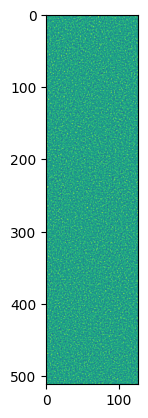

In [12]:
# Make a movie of charge density in x-y

print(species[0])
quantity = get_osiris_quantity_2d(f'{proj_dir}{species[1]}/charge/')

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='charge-density-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()


plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"/electron_phase_space.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_e(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        # plt.ylim(-0.3,0.3)
        writer.grab_frame()

plt.imshow(quantity[0][1])

In [ ]:
# check that you don't have too much numerical heating

/tmp/ipykernel_33457/4209653748.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)


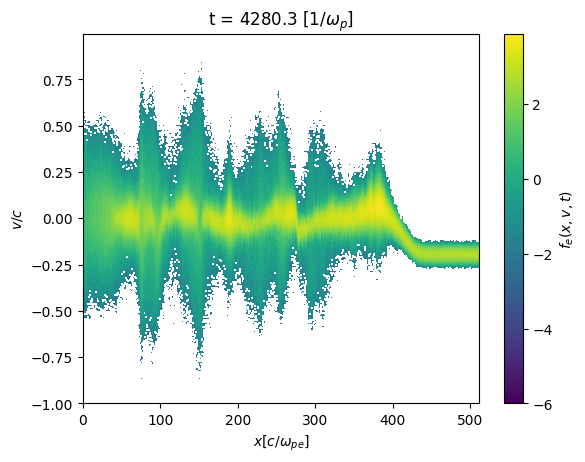

In [3]:

p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"figures/electron_phase_space.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_e(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        # plt.ylim(-0.3,0.3)
        writer.grab_frame()

/tmp/ipykernel_33457/692526659.py:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)


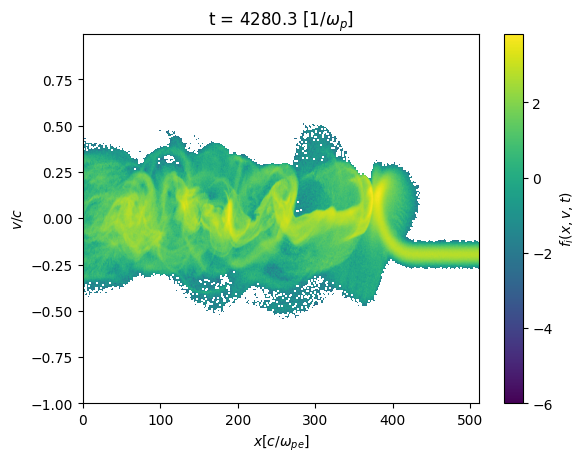

In [5]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/ions/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=18, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()

plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"figures/ion_phase_space.mp4", dpi=400):
    for file in p1x1_files:
        p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/ions/{file}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f't = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_i(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        # plt.ylim(-0.3,0.3)
        writer.grab_frame()

In [17]:
dir = "pairplasma/data"
print(dir.removesuffix('data'))

species = 'positrons'

print(r'$log(f_'+species[0]+r'(x,v,t))$')

pairplasma/
log(f_p(x,v,t))


In [18]:
print(r'$\omega$')

$\omega$
